In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
file_path = r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S4_Datafile_Practice.csv"
df = pd.read_csv(file_path)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

prophet_df = df[['Date', 'Close', 'Volume']].copy()
prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [5]:
train_size = int(len(prophet_df) * 0.8)
train_df = prophet_df.iloc[:train_size]

In [6]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model.add_regressor('Volume')

model.fit(train_df)

08:56:55 - cmdstanpy - INFO - Chain [1] start processing
08:56:55 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = model.make_future_dataframe(
    periods=len(prophet_df) - train_size,
    freq='M'
)

future['Volume'] = prophet_df['Volume'].values

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [8]:
forecast = model.predict(future)

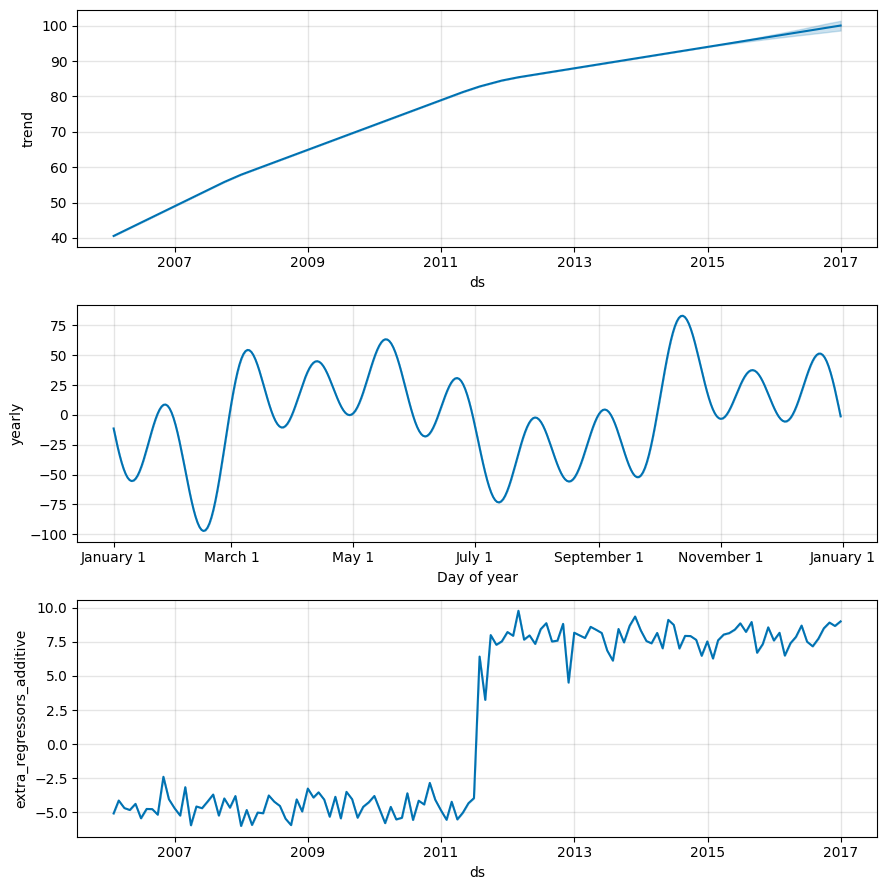

In [9]:
model.plot_components(forecast)
plt.show()